# Correlation Analysis

 The goal of this step is to find out important relationships between features. We will follow the procedures below to find the correlation between the features.

&nbsp; &nbsp; **1. Convert categorical values into numerical values.**

&nbsp; &nbsp; **2.  Analyze correlation between 'Purchase' and other features.**

&nbsp; &nbsp; **3. Produce user data and analyze the correlation.**

&nbsp; &nbsp; **4. Analyze correlation between 'Product Category' and other features.**



<br>


 Before we start, we'll use the clean data that we got in the first step, **Exploratory Data Analysis**. At the first step, we found that there are lots of missing values in Product_Category_2 and Product_Category_3. We thought that these columns are related to the values in Product_Category_1, so we'll use only Product_Category_1 in correlation analysis. 

In [1]:
import os
import seaborn as sns
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BlackFriday.csv')
data_c = data

In [3]:
del_columns = ['Product_Category_2', 'Product_Category_3']
data_c.drop(del_columns, inplace=True, axis=1)
data_c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


 We deleted the column Product_Category_2 and Product_Category_3 like the table above. In the case of product category, we'll only use Product_Category_1 in the latter step. 

## 1. Convert Categorical values into numerical values

 To find the correlation between the features, each feature should be converted into numerical values. Let's look at the data types and unique values of each feature.

In [4]:
data_c.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

In [5]:
data_c.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

<br>

`Gender` : There are two gender(female and male) so we can make this binary. 

`Age` : This column presents 7 age groups. Age should be treated as numerical, so we can convert the variables into 0 - 7.

`City_Category` : This column has 3 types of cities. It consists of A, B and C. So, we can convert the varibles into 0 - 7.

`Stay_In_Current_City_Years` : The '+' symbol should be treated.

#### 1.1. Convert `Gender` into binary values

In [6]:
# Convert F -> 1, M -> 0 
data_c['Gender'] = (data_c['Gender'] == 'F').astype(int)
data_c.Gender.value_counts()

0    405380
1    132197
Name: Gender, dtype: int64

#### 1.2. Convert `Age` into numerical values

In [7]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data_c["Age"] = data_c["Age"].apply(lambda line: age_dict[line])
data_c.Age.value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

#### 1.3. Convert `City_Category` into numerical values

In [8]:
# There exists 'A' 'B' 'C' in City_Category
# Giving City_Category Numerical values
city_dict = {'A':0, 'B':1, 'C':2 }
data_c["City_Category"] = data_c["City_Category"].apply(lambda line: city_dict[line])
data_c.City_Category.value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

#### 1.4. Convert `Stay_In_Current_City` into numerical values

In [9]:
# Giving City_Category Numerical values
# Convert 4+ into 4
city_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4 }
data_c["Stay_In_Current_City_Years"] = data_c["Stay_In_Current_City_Years"].apply(lambda line: city_dict[line])
data_c.Stay_In_Current_City_Years.value_counts()

1    189192
2     99459
3     93312
4     82889
0     72725
Name: Stay_In_Current_City_Years, dtype: int64

In [10]:
data_c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370
1,1000001,P00248942,1,0,10,0,2,0,1,15200
2,1000001,P00087842,1,0,10,0,2,0,12,1422
3,1000001,P00085442,1,0,10,0,2,0,12,1057
4,1000002,P00285442,0,6,16,2,4,0,8,7969


 Therefore, we can get the data of the numerical features through the process above. We'll use this converted data in the correlation analysis.

<br>
<br>

 Before we get into **Step 2**,  we'll visualize the **pearson** correlation between all numeric features of the data that we converted through the previous proceeses. 

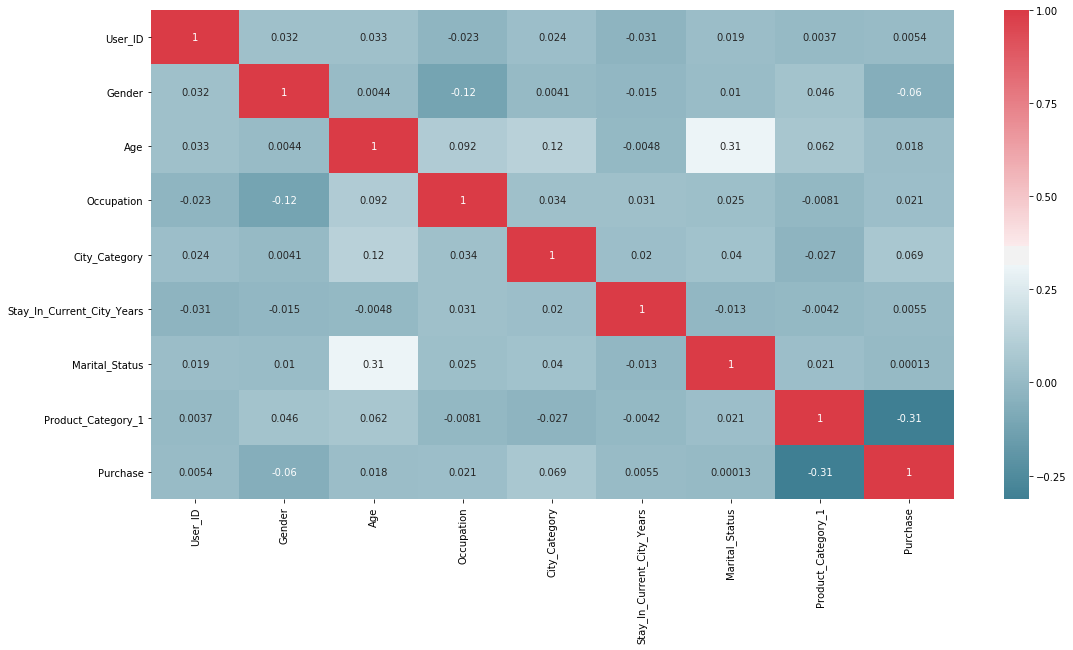

In [12]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = data_c.corr(method = 'pearson')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

<br>

## 2. Analyze Correlation between `Purchase` and other features

 In correlation analysis, we first find the correlation between **`Purchase`** and other numerical features. We'll get the correlation using the **pearson** method and **spearman** method.

#### 2.1. Pearson Correlation between `Purchase` and other numerical features

In [14]:
numeric_features = data_c.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase                      1.000000
City_Category                 0.068507
Occupation                    0.021104
Age                           0.017717
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
Gender                       -0.060086
Product_Category_1           -0.314125
Name: Purchase, dtype: float64 



  The above table shows that the **types of city** has the highest correlation with the `Purchase` (the price of the product) among the other numerical features. But still, correlation value is low. For clear understanding the relationship between the `City_Category` and `Purchase`, let's visualize `Purchase` among the `City_Category`. 

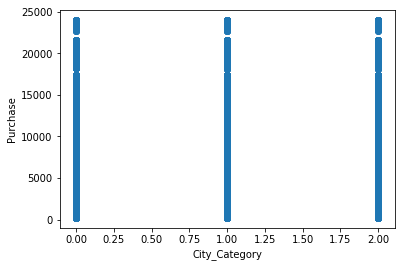

In [38]:
# Change the line plot below to a scatter plot
plt.scatter(data_c['City_Category'], data_c['Purchase'])
plt.xlabel('City_Category')
plt.ylabel('Purchase')
# Show plot
plt.show()

 As we can see in the above scatter plot, the distribution of the `Purchase` among the `CIty_Category` is not clear. 

#### 2.2 Spearman Correlation between `Purchase` and other numerical features

 Through the previous step **2.2**, we found the pearson correlation between `Purchase` and other features. In this step, we'll get the spearman correlation. For the meaningful result, we are going to use the part among the numerical features. 

In [14]:
selected_features = {"Stay_In_Current_City_Years", "Age", "Purchase"}

We select the features that have continuous values `Stay_In_Current_City_Years` and `Age` to use in Spearman correlation analysis. The features that have the categorical values are excluded. The table below is the result of the Spearman correlation between `Purchase` and the selected features

In [15]:
spear_data = data_c[selected_features]
corr = spear_data.corr(method = 'spearman')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n') 

Purchase                      1.000000
Age                           0.021708
Stay_In_Current_City_Years    0.006011
Name: Purchase, dtype: float64 



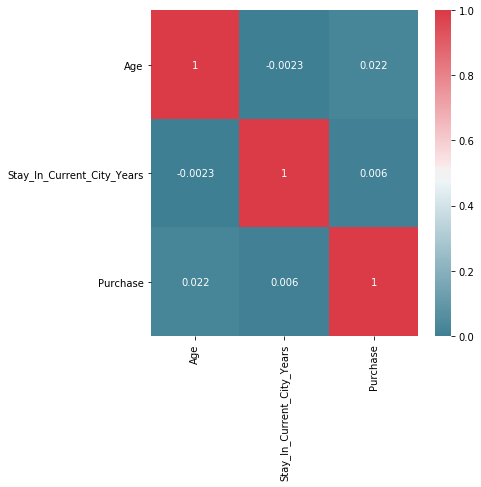

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
corrmat = data_c[selected_features].corr(method = 'spearman')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

We can see that `Age` has the highest spearman correlation with `Purchase` among the selected features. The heatmap above is the visualization of the spearman correlation between the selected features.

<br>

## 3.  Produce user data and analyze the correlation.

 We can create the **`user_data`** using the original features and some added features. We'll calculate the amount of purchase of each user and the number of products that each user bought.

In [18]:
temp = data_c.groupby(['User_ID']).count()
temp['sumPurchase'] = data_c.groupby(['User_ID'])['Purchase'].sum()
df2 = pd.DataFrame({'User_ID':temp['Product_ID'].index, 'countProduct':temp['Product_ID'].values, 'sumPurchase':temp['sumPurchase']})
user_data = data_c.join(df2.set_index('User_ID'), on='User_ID').sort_values(['User_ID'])

#user_data 에 대해 user_id 기준 행 중복 제거. 첫번째 행만 남기고 지움.
user_data = user_data.drop_duplicates(["User_ID"], keep="first")
user_data = user_data.reset_index(drop = True)
user_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,countProduct,sumPurchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370,34,333481
1,1000002,P00289342,0,6,16,2,4,0,5,5260,76,810353
2,1000003,P00117042,0,2,15,0,3,0,1,3938,29,341635
3,1000004,P00329542,0,4,7,1,2,1,1,3849,13,205987
4,1000005,P00147942,0,2,20,0,1,1,1,15466,106,821001


 We calculated the amount of purchase of each user as `sumPurchase` and the number of products that each user bought as `countProduct` to create the user's data. We thought that information about the product is unneccessary in the `user_data`. Thus, we delete the columns of `Product_ID` and `Product_Category_1` to create the users' data.  

In [19]:
del_columns = ['Product_ID', 'Product_Category_1']
user_data.drop(del_columns, axis=1, inplace = True)

In [20]:
user_data.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase',
       'countProduct', 'sumPurchase'],
      dtype='object')

<br>

With this `user_data`, we'll find the correlation between the features of the data. 

#### 3.1. Pearson correlation between the features of `user_data`

 Let's see the correlation between the `sumPurchase` and other numerical eatures of `user_data`. 

In [21]:
numeric_features = user_data.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['sumPurchase'].sort_values(ascending=False)[:10],'\n')

sumPurchase                   1.000000
countProduct                  0.978977
Stay_In_Current_City_Years    0.003296
Occupation                    0.000419
User_ID                      -0.014669
Marital_Status               -0.020592
Purchase                     -0.033442
Age                          -0.068740
Gender                       -0.102781
City_Category                -0.343058
Name: sumPurchase, dtype: float64 



 `countProduct` has extremly high correlation with `sumPurchase`. So, we thought that we do not have to calculate the correlation between `countProduct` and other numeric features of `user_data`. We guessed that the result of the correlation between `countProduct` and other features would be similar to the result of the correlation between `sumPurchase` and other features as we got previously. 

 Moreover, `Stay_In_Current_City_Years` has the second highest correlation value with `sumPurchase`. Also, `City_Category` has the lowest correlation value with `sumPurchase`. But it does not imply that `City_Category` is anti-correlated with `sumPurchase`. This is because `City_Category` is encoded as 0, 1 and 2, and there is no metadata of the `City_Category`. For more details, let's visualize the `City_Category` values with `sumPurchase` and `countProduct`.

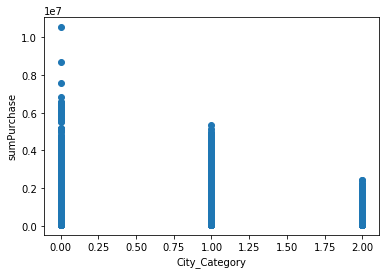

In [30]:
# Change the line plot below to a scatter plot
plt.scatter(user_data['City_Category'],user_data['sumPurchase'])
plt.xlabel('City_Category')
plt.ylabel('sumPurchase')
# Show plot
plt.show()

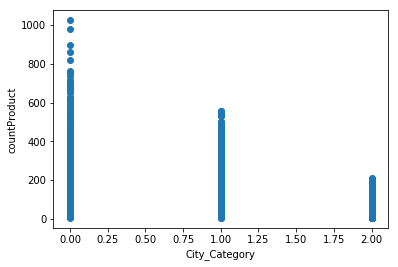

In [31]:
# Change the line plot below to a scatter plot
plt.scatter(user_data['City_Category'],user_data['countProduct'])
plt.xlabel('City_Category')
plt.ylabel('countProduct')
# Show plot
plt.show()

 First scatter plot shows the distribution of `sumPurchase` among the `City_Category`. Similarly, second scatter plot shows the distribution of `countProduct` among the `City_Category`. These two scatter plots show that people who live in **City_Category 1** tend to buy more products and spend more money than **City_Category 2** and **City_Category 3**. Therefore, as the city_category's encoded number increases, people tend to buy less items and spend less money to the products. This is why the correlation value between `City_Category` and `sumPurchase` is negative. It does not imply that these two features are anti-correlated. Rather, we can say that this `City_Category` has a relationship between the user's comsumption pattern. Even though we do not have the metadata for the `City_Category`, we can assume that **City_Category 1** is relatively richer than other cities like **City_Category 2 and 3.** 
 
 However, there exists a limitation. We do not have the metadata for the `City_Category`, so 

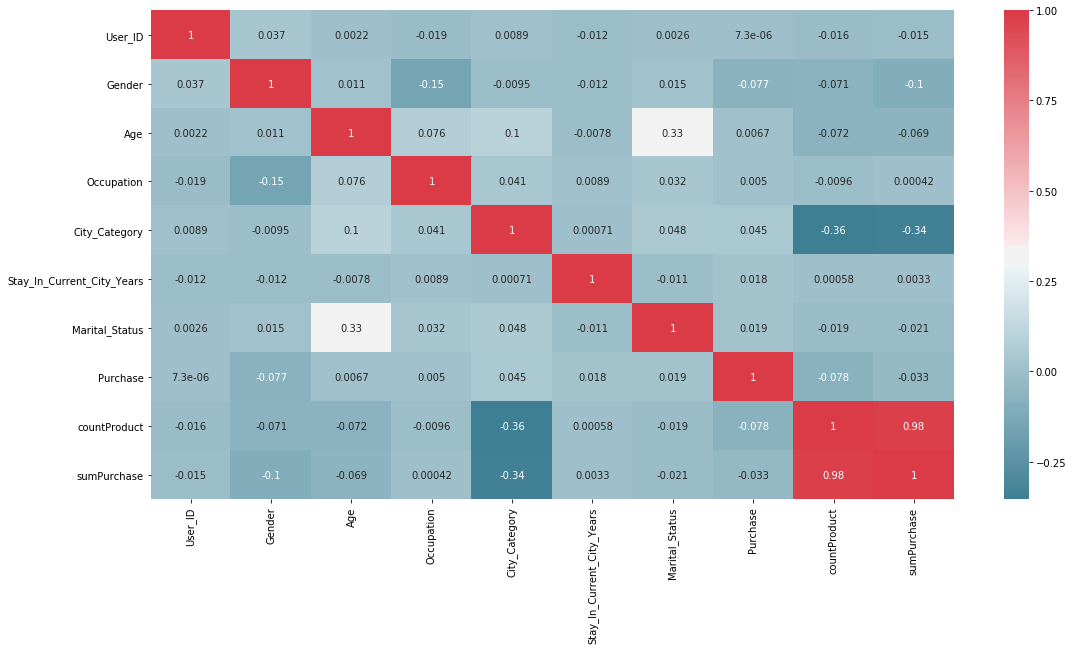

In [22]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = user_data.corr(method = 'pearson')
sns.heatmap(corr, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

 The heatmap shows the correlation between the features of `user_data`. As we assumed, we can find that the result of correlation between `countPurchase` and other features is similar with the result of correlation between `sumPurchase` and other feature. 
 <br>
 
 Based on the heatmap and correlation value of `user_data` above, we concluded that `City_Category` can be the feature of the users which are highly correlated with the number of product items that the user bought and the amount of purchase that the user spent. 

<br>

#### 3.2. Spearman correlation between the features of `user_data`

In this step, we'll get the spearman correlation. Like we used only three features in **2.2**, we are going to use the part among the numerical features.

We selected the features of `user_data` by applying the same criteria. 

In [45]:
selected_features = {"Stay_In_Current_City_Years", "Age", "sumPurchase", "countProduct"}

In [46]:
spear_data = user_data[selected_features]
corr = spear_data.corr(method = 'spearman')
print (corr['sumPurchase'].sort_values(ascending=False)[:10],'\n') 

sumPurchase                   1.000000
countProduct                  0.980553
Stay_In_Current_City_Years    0.007762
Age                          -0.063903
Name: sumPurchase, dtype: float64 



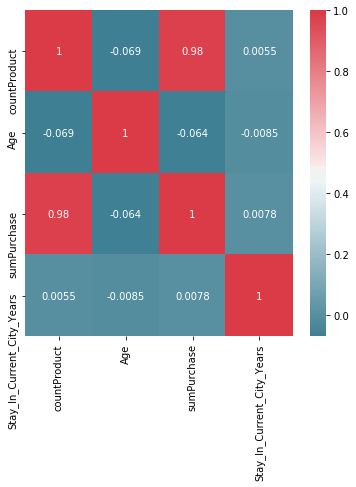

In [47]:
f, ax = plt.subplots(figsize=(6, 6))
corrmat = user_data[selected_features].corr(method = 'spearman')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

<br>
<br>

## 4. Analyze correlation between `Product Category` and other features.

 To find the correlation between `Product_Category_1` and other features of the data, we have to use the data of products, not users. So, we do not have to use `user_data`. The data used to analyze the correlation between `Product_Category_1` and other numerical featuresis not the `user_data`

  Also, we'll find the pearson correlation between the features and we wont find the spearman correlation. This is because the target features `Product_Category_1` is categorical data which is encoded to the numbers. 

In [48]:
#Number of times each value appears in the column
frequency = data_c['Product_Category_1'].value_counts()
print("Frequency distribution for Product_Category_1\n")
print(frequency)

Frequency distribution for Product_Category_1

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64


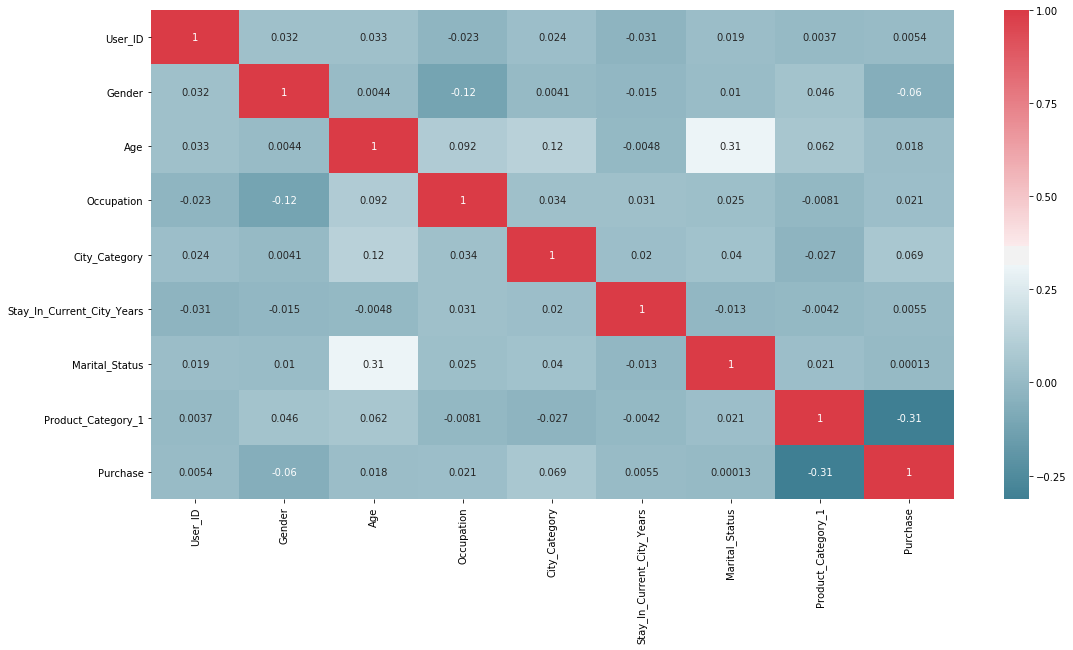

In [51]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = data_c.corr(method = 'pearson')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

#### Significance of correlation between purchase and other features

#####         Even small correlations become significant with large-enough sample sizes

In [ ]:
column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Sum_purchase", "Count_purchase", "Marital_Status", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Sum_purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(user_data["Sum_purchase"], user_data[col])
    print("<"+ col + ">")
    print("Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

- pearson correlation significance between COUNT_PURCHASE AND OTHER FEATURES

In [ ]:
column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Sum_purchase", "Count_purchase", "Marital_Status", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Count_purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(user_data["Count_purchase"], user_data[col])
    print("<"+ col + ">")
    print("Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

- spearman correlation significance between SUM_PURCHASE AND OTHER FEATURES

In [ ]:
column = {"Stay_In_Current_City_Years", "AgeInt", "Count_purchase", "Sum_purchase"} 

print("**Spearman Correlation Coefficient and p-value between Sum_purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = spearmanr(user_data["Sum_purchase"], user_data[col])
    print("<"+ col + ">")
    print("Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

In [ ]:
column = {"Stay_In_Current_City_Years", "AgeInt", "Count_purchase", "Sum_purchase"} 

print("**Spearman Correlation Coefficient and p-value between Count_purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = spearmanr(user_data["Count_purchase"], user_data[col])
    print("<"+ col + ">")
    print("Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

In [ ]:
# pearson correlation 분석 in user_data
# numeric_features = user_data.select_dtypes(include=[np.number])
# rp.corr_pair(numeric_features, method = "pearson")
rp.corr_pair(spear_data, method = "spearman")


나머지도 이렇게 표시하려고 했지만 에러가 떠버림.ㅠㅠ

### 2. Product_Category and other features

Just use the 'Product_Category_1' feature

In [ ]:
data2.head()

In [23]:
#Number of times each value appears in the column
frequency = data_c['Product_Category_1'].value_counts()
print("Frequency distribution for Product_Category_1\n")
print(frequency)

Frequency distribution for Product_Category_1

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64


Product Category 에는 18 개의 카테고리 존재

Product Category 기준으로 pearson correlation analysis

In [25]:
correlation between 'Product Category' and other features.

Product_Category_1            1.000000
Age                           0.061951
Gender                        0.045661
Marital_Status                0.020546
User_ID                       0.003687
Stay_In_Current_City_Years   -0.004182
Occupation                   -0.008114
City_Category                -0.027444
Purchase                     -0.314125
Name: Product_Category_1, dtype: float64 



#### Significance of correlation between Product Category and other features

Even small correlations become significant with large-enough sample sizes

In [ ]:
#instead of Numpy, can we use here Numpy and Scipy both library 
#to get the addition p value or in the existing  script can we add this function
#to obtain the p Value as a raster

from scipy.stats import pearsonr

column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1", "Purchase", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Product_Category_1 and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(data2["Product_Category_1"], data2[col])
    print("<"+ col + ">")
    print("coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

In [ ]:
user_data.apply(lambda x: len(x.unique()))